<a href="https://www.kaggle.com/code/nainapandey96/car-evaluation-ensemble?scriptVersionId=101324257" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

# Car Evaluation using ensemble learning

## About dataset

### Car Evaluation Database
It is a multi-class classification problem. 
Task is to classify our dataset into **4 classes** : Unacceptable, Acceptable, Good, Very-Good.

### Independent variables 

 1. buying : buying price
 2. maint : maintenance price
 3. doors : number of doors
 4. persons : capacity in terms of persons to carry
 5. lug_boot : the size of luggage boot
 6. safety: estimated safety of the car
 
### Target Variable
 1. Class

We will try to achieve the maximum accuracy using the different ensemble methods.

In [1]:
#Load up basic libraries first
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')


In [2]:
data=pd.read_csv('../input/how-much-would-a-car-cost-for-ml/car_evaluation.csv')

## EDA

In [3]:
data.head()

,buying,maint,doors,persons,lug_boot,safety,class
0,vhigh,vhigh,2,2,small,low,unacc
1,vhigh,vhigh,2,2,small,med,unacc
2,vhigh,vhigh,2,2,small,high,unacc
3,vhigh,vhigh,2,2,med,low,unacc
4,vhigh,vhigh,2,2,med,med,unacc


In [4]:
# all our data is of object type
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1728 entries, 0 to 1727
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   buying    1728 non-null   object
 1   maint     1728 non-null   object
 2   doors     1728 non-null   object
 3   persons   1728 non-null   object
 4   lug_boot  1728 non-null   object
 5   safety    1728 non-null   object
 6   class     1728 non-null   object
dtypes: object(7)
memory usage: 94.6+ KB


### Columns are categorical, check for unique values of each column

In [5]:
#We will quickly check for the unique values in our columns
for i in data.columns:
    print(data[i].unique(),"\t",data[i].nunique())
    

['vhigh' 'high' 'med' 'low'] 	 4
['vhigh' 'high' 'med' 'low'] 	 4
['2' '3' '4' '5more'] 	 4
['2' '4' 'more'] 	 3
['small' 'med' 'big'] 	 3
['low' 'med' 'high'] 	 3
['unacc' 'acc' 'vgood' 'good'] 	 4


Check how these unique categories are distributed among the columns

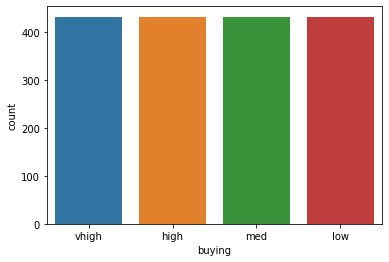

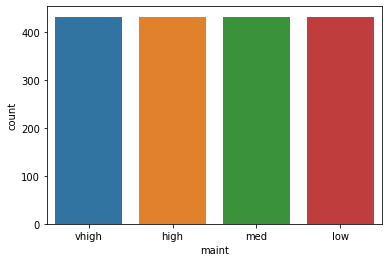

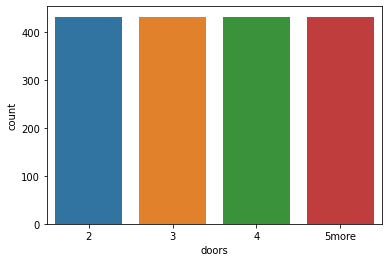

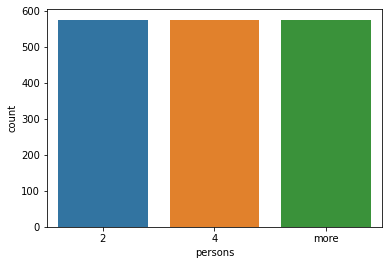

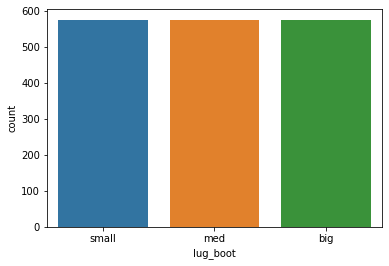

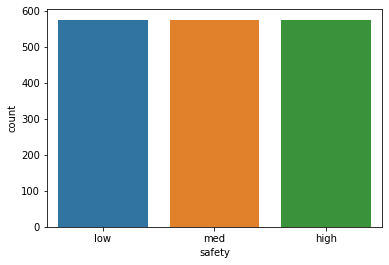

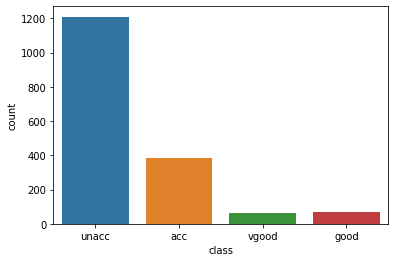

In [6]:
for i in data.columns:
    plt.figure()
    sns.countplot(data[i])
    plt.show()

From above output, it is clear that all the columns except 'class' are distributed equally among data. We will try to use cost sensitive random Forest classifier otherwise we will use SMOTE.

#### Class Distribution

It can be seen from the graph that the result 'class' is unbalanced with larger values of 'unacc'.
So, this is an unbalanced multiclass classification problem.

**Dummy encoding**

In [7]:
from sklearn.preprocessing import LabelEncoder

In [8]:
le=LabelEncoder()

In [9]:
for i in data.columns:
    data[i]=le.fit_transform(data[i])

In [10]:
data.head()

,buying,maint,doors,persons,lug_boot,safety,class
0,3,3,0,0,2,1,2
1,3,3,0,0,2,2,2
2,3,3,0,0,2,0,2
3,3,3,0,0,1,1,2
4,3,3,0,0,1,2,2


**Correlation matrix**

<AxesSubplot:>

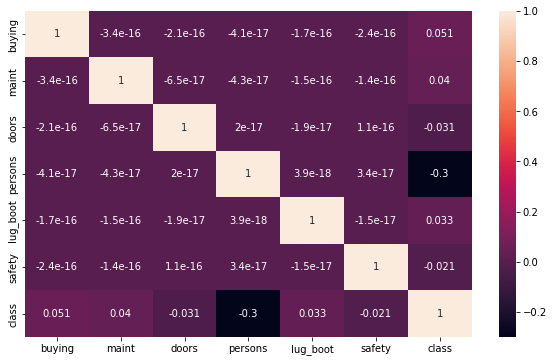

In [11]:
fig=plt.figure(figsize=(10,6))
sns.heatmap(data.corr(),annot=True)

Most of the columns show very weak correlation with 'class'
So, doing any analysis on them may not give any productive output.

In [12]:
X=data[data.columns[:-1]]
y=data['class']

In [13]:
X.head(2)

,buying,maint,doors,persons,lug_boot,safety
0,3,3,0,0,2,1
1,3,3,0,0,2,2


In [14]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

## Model Selection

In [15]:
from sklearn.model_selection import learning_curve
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

from sklearn.metrics import classification_report, confusion_matrix


### 1. Logistic Regression

In [16]:
logreg=LogisticRegression(solver='newton-cg',multi_class='multinomial')

In [17]:
logreg.fit(X_train,y_train)

LogisticRegression(multi_class='multinomial', solver='newton-cg')

In [18]:
pred=logreg.predict(X_test)

In [19]:
logreg.score(X_test,y_test)

0.6647398843930635

Logistic regression model is giving very less accuracy. 
Let's check with other algorithms.

### 2. KNN Classifier


In [20]:
knn=KNeighborsClassifier(n_jobs=-1)

In [21]:
knn.fit(X_train,y_train)
pred=knn.predict(X_test)
knn.score(X_test,y_test)


0.9094412331406551

In [22]:
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       0.86      0.75      0.81       118
           1       0.71      0.53      0.61        19
           2       0.92      1.00      0.96       358
           3       1.00      0.67      0.80        24

    accuracy                           0.91       519
   macro avg       0.88      0.74      0.79       519
weighted avg       0.91      0.91      0.90       519



Accuracy can't be a fair criterion to evaluate unbalanced classification, so check 'f1-score'
f1-score is 0.9 which is better than previous model

In [23]:
avg_score=[]
for k in range(2,30):
    knn=KNeighborsClassifier(n_jobs=-1,n_neighbors=k)
    score=cross_val_score(knn,X_train,y_train,cv=5,n_jobs=-1,scoring='accuracy')
    avg_score.append(score.mean())

Text(0, 0.5, 'accuracy')

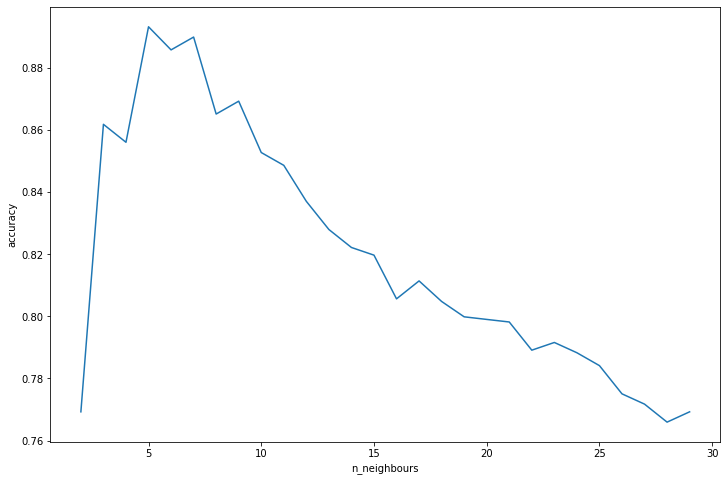

In [24]:
plt.figure(figsize=(12,8))
plt.plot(range(2,30),avg_score)
plt.xlabel("n_neighbours")
plt.ylabel("accuracy")
#plt.xticks(range(2,30,2))

So, n_neighbours=5 is giving better accuracy as well as f1-score for our data.

So, with KNN Classification algorithm, you were able to achieve accuracy of 90%

### 3.Random Forests Classifier

In [25]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import f1_score

In [26]:
rfc=RandomForestClassifier(n_estimators= 50,
criterion='entropy',
max_depth= 10,
max_features= 6,
max_leaf_nodes= None,
class_weight='balanced'
  )

In [27]:
rfc.fit(X_train,y_train)
print(rfc.score(X_test,y_test))
print(f1_score(y_test,rfc.predict(X_test),average='macro'))

0.9595375722543352
0.8878251133614942


RFC is providing 96% accuracy

### You can even get higher accuracy for RFC with following parameters:
n_estimators: 50
criterion: entropy
max_depth: 10
max_features: 6
max_leaf_nodes: None

### Now, use XGBoost and compare the model performance and accuracy

In [28]:
model=XGBClassifier(random_state=1,learning_rate=0.01)
model.fit(X_train, y_train)
model.score(X_test,y_test)

0.930635838150289

In [29]:
from lightgbm import LGBMClassifier
#params = {'learning_rate':0.001}
model= LGBMClassifier(learning_rate=0.001) 
model.fit(X_train,y_train)
model.score(X_test,y_test)

0.6897880539499036

In [30]:

from catboost import CatBoostClassifier
model=CatBoostClassifier()
#categorical_features_indices = np.where(df.dtypes != np.float)[0]
model.fit(X_train,y_train,eval_set=(X_test, y_test), verbose=0)
model.score(X_test,y_test)

0.9826589595375722

In [31]:
from sklearn.ensemble import GradientBoostingClassifier
model= GradientBoostingClassifier(learning_rate=0.01,random_state=1)
model.fit(X_train, y_train)
model.score(X_test,y_test)

0.766859344894027

In [32]:
from sklearn.ensemble import AdaBoostClassifier
model = AdaBoostClassifier(random_state=1)
model.fit(X_train, y_train)
model.score(X_test,y_test)

0.7764932562620424

So our catboost is giving us the highest accuracy with 98%